In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, r2_score,mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Model
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import KMeans

# Analyze and Cleaning

In [3]:
df = pd.read_csv('Salary Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df.shape

(375, 6)

In [5]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [6]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

c:\Users\zaida\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

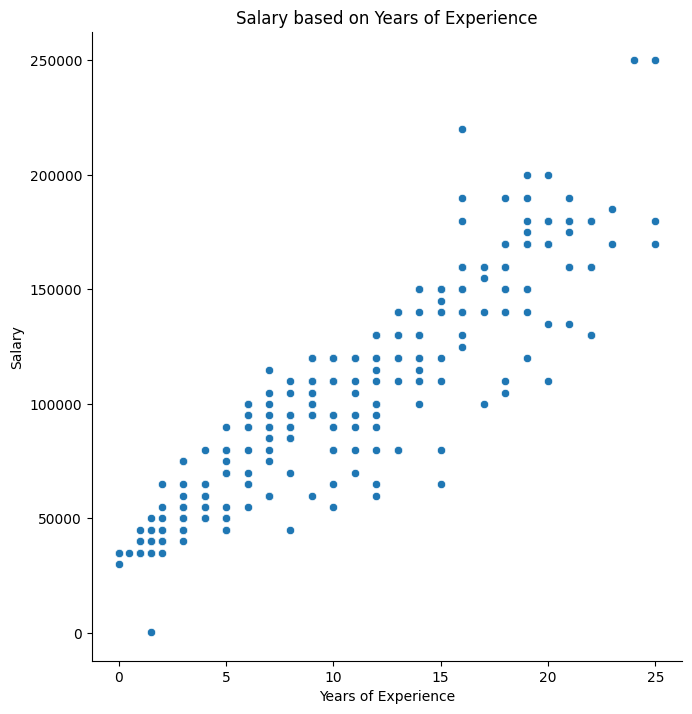

In [7]:
plt.figure(figsize=(12,6))
sns.pairplot(df,x_vars=['Years of Experience'],y_vars=['Salary'],size=7,kind='scatter')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary based on Years of Experience')
plt.show()

c:\Users\zaida\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

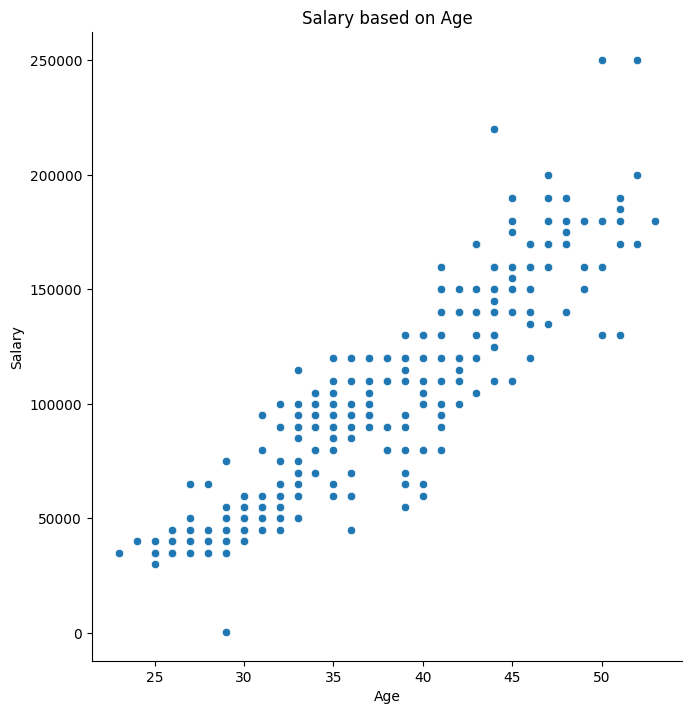

In [8]:
plt.figure(figsize=(12,6))
sns.pairplot(df,x_vars=['Age'],y_vars=['Salary'],size=7,kind='scatter')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Salary based on Age')
plt.show()

c:\Users\zaida\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

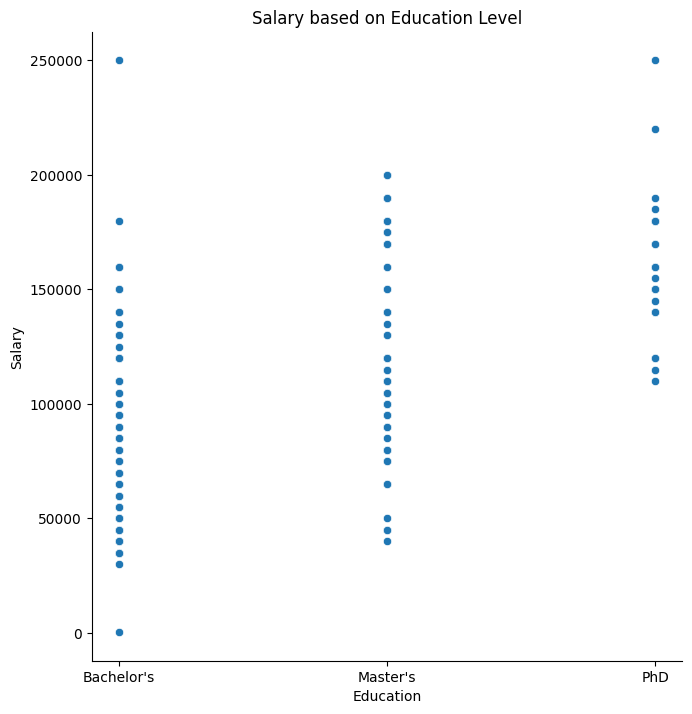

In [9]:
plt.figure(figsize=(12,6))
sns.pairplot(df,x_vars=['Education Level'],y_vars=['Salary'],size=7,kind='scatter')
plt.xlabel('Education')
plt.ylabel('Salary')
plt.title('Salary based on Education Level')
plt.show()

C:\Users\zaida\AppData\Local\Temp\ipykernel_13888\353013583.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


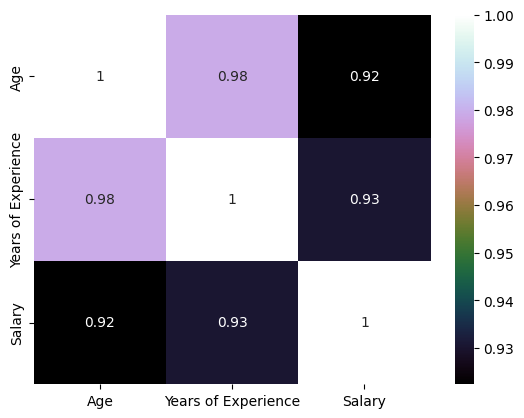

In [10]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='cubehelix')
plt.show()

In [ ]:
for i in df.columns:
    print(f"\t\t-------{i}-------")
    display(df[i].unique())

In [11]:
def prep(df):
    for col in df.columns:
        if df[col].isnull().sum() and df[col].dtypes == 'object':
            df[col].loc[(df[col].isnull())] = df[col].mode().max()

    for col in df.columns:
        if df[col].dtypes == 'float64':
            df[col] = df[col].fillna(df[col].mode().iloc[0])
    

# Preprocessing

In [12]:
df_copy = df.copy()

In [13]:
prep(df_copy)

C:\Users\zaida\AppData\Local\Temp\ipykernel_13888\273038111.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].loc[(df[col].isnull())] = df[col].mode().max()
C:\Users\zaida\AppData\Local\Temp\ipykernel_13888\273038111.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].loc[(df[col].isnull())] = df[col].mode().max()
C:\Users\zaida\AppData\Local\Temp\ipykernel_13888\273038111.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [14]:
df_copy.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [ ]:
for i in df_copy.columns:
    print(f"\t\t-------{i}-------")
    display(df_copy[i].unique())

In [15]:
le = preprocessing.LabelEncoder()

In [16]:
df_copy.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [17]:
cats = ['Education Level', 'Gender', 'Job Title']

for col in cats:
    df_copy[col] = le.fit_transform(df_copy[col])

In [18]:
df_copy

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,0,0,131,8.0,85000.0
371,43.0,1,1,30,19.0,170000.0
372,29.0,0,0,70,2.0,40000.0
373,34.0,1,0,137,7.0,90000.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


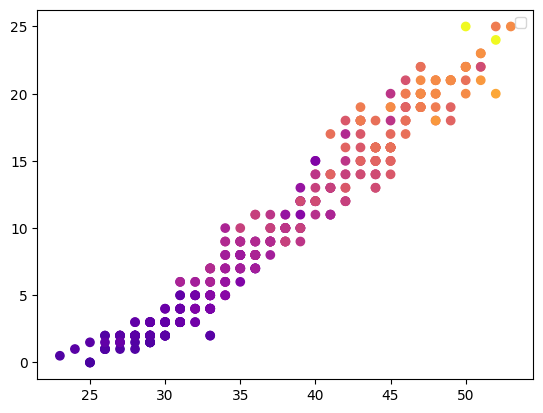

In [25]:
plt.scatter(df_copy['Age'], df_copy['Years of Experience'], c = df_copy['Salary'], cmap='plasma')
plt.legend()
plt.show()

# Modelling

In [74]:
x = df_copy.drop('Salary', axis=1)
y = df_copy['Salary']

In [75]:
x.head()

,Age,Gender,Education Level,Job Title,Years of Experience
0,32.0,1,0,159,5.0
1,28.0,0,1,17,3.0
2,45.0,1,2,130,15.0
3,36.0,0,0,101,7.0
4,52.0,1,1,22,20.0


Standarized Independent Variable

In [76]:
scaler = StandardScaler()

In [77]:
x = scaler.fit_transform(x)

In [78]:
x[:5]

array([[-0.76729521,  0.95564915, -0.73896893,  1.49064807, -0.76072901],
       [-1.33482126, -1.04640913,  0.64659782, -1.56067082, -1.06575268],
       [ 1.07716443,  0.95564915,  2.03216457,  0.86749139,  0.7643893 ],
       [-0.19976917, -1.04640913, -0.73896893,  0.24433472, -0.45570535],
       [ 2.07033501,  0.95564915,  0.64659782, -1.45323002,  1.52694845]])

KMeans Clustering

In [79]:
km = KMeans(n_clusters=5, random_state=42)

In [80]:
km_cluster = km.fit_predict(x)

c:\Users\zaida\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [81]:
x_cluster = np.column_stack((x, km_cluster))

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x_cluster, y, test_size=0.2, random_state=42)

Linear Regression

In [83]:
lr = LinearRegression()

In [84]:
lr.fit(x_train, y_train)

LinearRegression()

In [85]:
lr_pred = lr.predict(x_test)

In [86]:
lr_mse = mean_squared_error(y_test,lr_pred)
print("Mean Square Error:", lr_mse)

Mean Square Error: 251315316.75565606


In [87]:
lr_r2 = r2_score(y_test,lr_pred)
print("R Square:", lr_r2)

R Square: 0.8983443662561391


Decision Tree Classifier

In [88]:
dt = DecisionTreeRegressor()

In [89]:
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [90]:
dt_pred = dt.predict(x_test)

In [91]:
dt_mse = mean_squared_error(y_test, dt_pred)
print("Mean Square Error:", dt_mse)

Mean Square Error: 220333333.33333334


In [92]:
dt_r2 = r2_score(y_test, dt_pred)
print("R Square:", dt_r2)

R Square: 0.910876404494382
